In [1]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
from nltk.chunk import ne_chunk

In [2]:
sentence = 'European authorities fined Google a record $5.1 billion on Wednesday for abusing its power in the mobile phone market and ordered the company to alter its practices'

In [3]:
ne_tree = ne_chunk(pos_tag(word_tokenize(sentence)))

In [4]:
print(ne_tree)

(S
  (GPE European/JJ)
  authorities/NNS
  fined/VBD
  (PERSON Google/NNP)
  a/DT
  record/NN
  $/$
  5.1/CD
  billion/CD
  on/IN
  Wednesday/NNP
  for/IN
  abusing/VBG
  its/PRP$
  power/NN
  in/IN
  the/DT
  mobile/JJ
  phone/NN
  market/NN
  and/CC
  ordered/VBD
  the/DT
  company/NN
  to/TO
  alter/VB
  its/PRP$
  practices/NNS)


In [36]:
#ex = 'European authorities fined Google a record $5.1 billion on Wednesday for abusing its power in the mobile phone market and ordered the company to alter its practices'
ex='With a stay at Petpimarn Boutique Resort in Bangkok (Chatuchak), you\'ll be within a 15-minute drive of Kasetsart University and IMPACT Arena. This hotel is 9.7 mi (15.6 km) from Temple of the Emerald Buddha and 10 mi (16.2 km) from Wat Arun. Make yourself at home in one of the 89 air-conditioned rooms featuring refrigerators. Complimentary wireless Internet access keeps you connected, and digital programming is available for your entertainment. Bathrooms have showers and complimentary toiletries. Conveniences include desks and complimentary bottled water, and housekeeping is provided daily.Make use of convenient amenities, which include complimentary wireless Internet access and tour/ticket assistance., ,At Petpimarn Boutique Resort, enjoy a satisfying meal at the restaurant. English breakfasts are available daily from 6:30 AM to 10 AM for a fee., ,Featured amenities include dry cleaning/laundry services, a 24-hour front desk, and luggage storage. Free self parking is available onsite.'

In [6]:
def preprocess(sent):
    sent = nltk.word_tokenize(sent)
    sent = nltk.pos_tag(sent)
    return sent

In [37]:
sent = preprocess(ex)
sent

[('With', 'IN'),
 ('a', 'DT'),
 ('stay', 'NN'),
 ('at', 'IN'),
 ('Petpimarn', 'NNP'),
 ('Boutique', 'NNP'),
 ('Resort', 'NNP'),
 ('in', 'IN'),
 ('Bangkok', 'NNP'),
 ('(', '('),
 ('Chatuchak', 'NNP'),
 (')', ')'),
 (',', ','),
 ('you', 'PRP'),
 ("'ll", 'MD'),
 ('be', 'VB'),
 ('within', 'IN'),
 ('a', 'DT'),
 ('15-minute', 'JJ'),
 ('drive', 'NN'),
 ('of', 'IN'),
 ('Kasetsart', 'NNP'),
 ('University', 'NNP'),
 ('and', 'CC'),
 ('IMPACT', 'NNP'),
 ('Arena', 'NNP'),
 ('.', '.'),
 ('This', 'DT'),
 ('hotel', 'NN'),
 ('is', 'VBZ'),
 ('9.7', 'CD'),
 ('mi', 'NN'),
 ('(', '('),
 ('15.6', 'CD'),
 ('km', 'NN'),
 (')', ')'),
 ('from', 'IN'),
 ('Temple', 'NN'),
 ('of', 'IN'),
 ('the', 'DT'),
 ('Emerald', 'NNP'),
 ('Buddha', 'NNP'),
 ('and', 'CC'),
 ('10', 'CD'),
 ('mi', 'NN'),
 ('(', '('),
 ('16.2', 'CD'),
 ('km', 'NN'),
 (')', ')'),
 ('from', 'IN'),
 ('Wat', 'NNP'),
 ('Arun', 'NNP'),
 ('.', '.'),
 ('Make', 'VB'),
 ('yourself', 'PRP'),
 ('at', 'IN'),
 ('home', 'NN'),
 ('in', 'IN'),
 ('one', 'CD'),
 ('o

In [38]:
pattern = 'NP: {<DT>?<JJ>*<NN>}'

In [39]:
cp = nltk.RegexpParser(pattern)
cs = cp.parse(sent)
print(cs)

(S
  With/IN
  (NP a/DT stay/NN)
  at/IN
  Petpimarn/NNP
  Boutique/NNP
  Resort/NNP
  in/IN
  Bangkok/NNP
  (/(
  Chatuchak/NNP
  )/)
  ,/,
  you/PRP
  'll/MD
  be/VB
  within/IN
  (NP a/DT 15-minute/JJ drive/NN)
  of/IN
  Kasetsart/NNP
  University/NNP
  and/CC
  IMPACT/NNP
  Arena/NNP
  ./.
  (NP This/DT hotel/NN)
  is/VBZ
  9.7/CD
  (NP mi/NN)
  (/(
  15.6/CD
  (NP km/NN)
  )/)
  from/IN
  (NP Temple/NN)
  of/IN
  the/DT
  Emerald/NNP
  Buddha/NNP
  and/CC
  10/CD
  (NP mi/NN)
  (/(
  16.2/CD
  (NP km/NN)
  )/)
  from/IN
  Wat/NNP
  Arun/NNP
  ./.
  Make/VB
  yourself/PRP
  at/IN
  (NP home/NN)
  in/IN
  one/CD
  of/IN
  the/DT
  89/CD
  air-conditioned/JJ
  rooms/NNS
  featuring/VBG
  refrigerators/NNS
  ./.
  Complimentary/NNP
  wireless/JJ
  Internet/NNP
  (NP access/NN)
  keeps/VBZ
  you/PRP
  connected/VBN
  ,/,
  and/CC
  (NP digital/JJ programming/NN)
  is/VBZ
  available/JJ
  for/IN
  your/PRP$
  (NP entertainment/NN)
  ./.
  Bathrooms/NNS
  have/VBP
  showers/NNS
  and/CC


In [47]:
from IPython.display import display
NPChunker = nltk.RegexpParser(pattern) 
result = NPChunker.parse(sent)


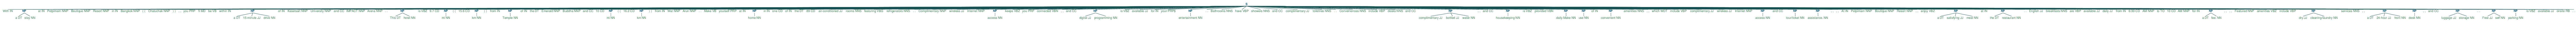

In [49]:
import os
from IPython.display import Image, display
from nltk.draw import TreeWidget
from nltk.draw.util import CanvasFrame
def jupyter_draw_nltk_tree(tree):
    cf = CanvasFrame()
    tc = TreeWidget(cf.canvas(), tree)
    tc['node_font'] = 'arial 13 bold'
    tc['leaf_font'] = 'arial 14'
    tc['node_color'] = '#005990'
    tc['leaf_color'] = '#3F8F57'
    tc['line_color'] = '#175252'
    cf.add_widget(tc, 12, 12)
    cf.print_to_file('tmp_tree_output.ps')
    cf.destroy()
    os.system('convert tmp_tree_output.ps tmp_tree_output.png')
    display(Image(filename='tmp_tree_output.png'))
    os.system('rm tmp_tree_output.ps tmp_tree_output.png')
#result.draw()
jupyter_draw_nltk_tree(result)

In [50]:
from nltk.chunk import conlltags2tree, tree2conlltags
from pprint import pprint

iob_tagged = tree2conlltags(cs)
pprint(iob_tagged)

[('With', 'IN', u'O'),
 ('a', 'DT', u'B-NP'),
 ('stay', 'NN', u'I-NP'),
 ('at', 'IN', u'O'),
 ('Petpimarn', 'NNP', u'O'),
 ('Boutique', 'NNP', u'O'),
 ('Resort', 'NNP', u'O'),
 ('in', 'IN', u'O'),
 ('Bangkok', 'NNP', u'O'),
 ('(', '(', u'O'),
 ('Chatuchak', 'NNP', u'O'),
 (')', ')', u'O'),
 (',', ',', u'O'),
 ('you', 'PRP', u'O'),
 ("'ll", 'MD', u'O'),
 ('be', 'VB', u'O'),
 ('within', 'IN', u'O'),
 ('a', 'DT', u'B-NP'),
 ('15-minute', 'JJ', u'I-NP'),
 ('drive', 'NN', u'I-NP'),
 ('of', 'IN', u'O'),
 ('Kasetsart', 'NNP', u'O'),
 ('University', 'NNP', u'O'),
 ('and', 'CC', u'O'),
 ('IMPACT', 'NNP', u'O'),
 ('Arena', 'NNP', u'O'),
 ('.', '.', u'O'),
 ('This', 'DT', u'B-NP'),
 ('hotel', 'NN', u'I-NP'),
 ('is', 'VBZ', u'O'),
 ('9.7', 'CD', u'O'),
 ('mi', 'NN', u'B-NP'),
 ('(', '(', u'O'),
 ('15.6', 'CD', u'O'),
 ('km', 'NN', u'B-NP'),
 (')', ')', u'O'),
 ('from', 'IN', u'O'),
 ('Temple', 'NN', u'B-NP'),
 ('of', 'IN', u'O'),
 ('the', 'DT', u'O'),
 ('Emerald', 'NNP', u'O'),
 ('Buddha', 'NNP', 

In [43]:
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()

In [53]:
#doc = nlp(u'European authorities fined Google a record $5.1 billion on Wednesday for abusing its power in the mobile phone market and ordered the company to alter its practices')
doc = nlp(u'With a stay at Petpimarn Boutique Resort in Bangkok (Chatuchak), you\'ll be within a 15-minute drive of Kasetsart University and IMPACT Arena. This hotel is 9.7 mi (15.6 km) from Temple of the Emerald Buddha and 10 mi (16.2 km) from Wat Arun. Make yourself at home in one of the 89 air-conditioned rooms featuring refrigerators. Complimentary wireless Internet access keeps you connected, and digital programming is available for your entertainment. Bathrooms have showers and complimentary toiletries. Conveniences include desks and complimentary bottled water, and housekeeping is provided daily.Make use of convenient amenities, which include complimentary wireless Internet access and tour/ticket assistance., ,At Petpimarn Boutique Resort, enjoy a satisfying meal at the restaurant. English breakfasts are available daily from 6:30 AM to 10 AM for a fee., ,Featured amenities include dry cleaning/laundry services, a 24-hour front desk, and luggage storage. Free self parking is available onsite.')
pprint([(X.text, X.label_) for X in doc.ents])

[(u'Petpimarn Boutique Resort', u'FAC'),
 (u'Bangkok', u'GPE'),
 (u'Chatuchak', u'ORG'),
 (u'15-minute', u'CARDINAL'),
 (u'Kasetsart University', u'ORG'),
 (u'9.7', u'CARDINAL'),
 (u'15.6 km', u'QUANTITY'),
 (u'Temple of the Emerald Buddha', u'ORG'),
 (u'10', u'CARDINAL'),
 (u'16.2 km', u'QUANTITY'),
 (u'Wat Arun', u'ORG'),
 (u'89', u'CARDINAL'),
 (u'Bathrooms', u'ORG'),
 (u'daily', u'DATE'),
 (u'Petpimarn Boutique Resort', u'FAC'),
 (u'English', u'NORP'),
 (u'6:30 AM to 10 AM', u'TIME'),
 (u'Featured', u'PERSON'),
 (u'24-hour', u'CARDINAL')]


In [54]:
pprint([(X, X.ent_iob_, X.ent_type_) for X in doc])

[(With, u'O', u''),
 (a, u'O', u''),
 (stay, u'O', u''),
 (at, u'O', u''),
 (Petpimarn, u'B', u'FAC'),
 (Boutique, u'I', u'FAC'),
 (Resort, u'I', u'FAC'),
 (in, u'O', u''),
 (Bangkok, u'B', u'GPE'),
 ((, u'O', u''),
 (Chatuchak, u'B', u'ORG'),
 (), u'O', u''),
 (,, u'O', u''),
 (you, u'O', u''),
 ('ll, u'O', u''),
 (be, u'O', u''),
 (within, u'O', u''),
 (a, u'O', u''),
 (15-minute, u'B', u'CARDINAL'),
 (drive, u'O', u''),
 (of, u'O', u''),
 (Kasetsart, u'B', u'ORG'),
 (University, u'I', u'ORG'),
 (and, u'O', u''),
 (IMPACT, u'O', u''),
 (Arena, u'O', u''),
 (., u'O', u''),
 (This, u'O', u''),
 (hotel, u'O', u''),
 (is, u'O', u''),
 (9.7, u'B', u'CARDINAL'),
 (mi, u'O', u''),
 ((, u'O', u''),
 (15.6, u'B', u'QUANTITY'),
 (km, u'I', u'QUANTITY'),
 (), u'O', u''),
 (from, u'O', u''),
 (Temple, u'B', u'ORG'),
 (of, u'I', u'ORG'),
 (the, u'I', u'ORG'),
 (Emerald, u'I', u'ORG'),
 (Buddha, u'I', u'ORG'),
 (and, u'O', u''),
 (10, u'B', u'CARDINAL'),
 (mi, u'O', u''),
 ((, u'O', u''),
 (16.2, 

In [57]:
displacy.render(nlp(str(doc).decode('utf-8')), jupyter=True, style='ent')

In [61]:

displacy.render(nlp(str(doc).decode('utf-8')), style='dep', jupyter = True, options = {'distance': 150})

In [63]:

labels = [x.label_ for x in  nlp(str(doc).decode('utf-8')).ents]
Counter(labels)

Counter({u'CARDINAL': 5,
         u'DATE': 1,
         u'FAC': 2,
         u'GPE': 1,
         u'NORP': 1,
         u'ORG': 5,
         u'PERSON': 1,
         u'QUANTITY': 2,
         u'TIME': 1})

In [45]:
from bs4 import BeautifulSoup
import requests
import re

In [46]:
def url_to_string(url):
    res = requests.get(url)
    html = res.text
    soup = BeautifulSoup(html, 'html5lib')
    for script in soup(["script", "style", 'aside']):
        script.extract()
    return " ".join(re.split(r'[\n\t]+', soup.get_text()))

In [19]:
ny_bb = url_to_string('https://www.nytimes.com/2018/08/13/us/politics/peter-strzok-fired-fbi.html?hp&action=click&pgtype=Homepage&clickSource=story-heading&module=first-column-region&region=top-news&WT.nav=top-news')
article = nlp(ny_bb)
len(article.ents)

191

In [20]:
labels = [x.label_ for x in article.ents]
Counter(labels)

Counter({u'CARDINAL': 5,
         u'DATE': 30,
         u'EVENT': 1,
         u'GPE': 36,
         u'LOC': 1,
         u'NORP': 5,
         u'ORDINAL': 1,
         u'ORG': 28,
         u'PERSON': 83,
         u'WORK_OF_ART': 1})

In [21]:
items = [x.text for x in article.ents]
Counter(items).most_common(3)

[(u'Strzok', 32), (u'F.B.I.', 17), (u'Trump', 10)]

In [22]:
sentences = [x for x in article.sents]
print(sentences[20])

A spokeswoman for the F.B.I. did not respond to a message seeking comment about why Mr. Strzok was dismissed rather than demoted.


In [27]:
displacy.render(nlp(str(sentences[20]).decode('utf-8')), jupyter=True, style='ent')

In [59]:
displacy.render(nlp(str(sentences[20]).decode('utf-8')), style='dep', jupyter = True, options = {'distance': 120})

In [62]:
[(x.orth_,x.pos_, x.lemma_) for x in [y 
                                      for y
                                      in nlp(str(sentences[20]).decode('utf-8')) 
                                      if not y.is_stop and y.pos_ != 'PUNCT']]

[(u'A', u'DET', u'a'),
 (u'spokeswoman', u'NOUN', u'spokeswoman'),
 (u'F.B.I.', u'PROPN', u'f.b.i.'),
 (u'respond', u'VERB', u'respond'),
 (u'message', u'NOUN', u'message'),
 (u'seeking', u'VERB', u'seek'),
 (u'comment', u'NOUN', u'comment'),
 (u'Mr.', u'PROPN', u'mr.'),
 (u'Strzok', u'PROPN', u'strzok'),
 (u'dismissed', u'VERB', u'dismiss'),
 (u'demoted', u'VERB', u'demote')]

In [36]:
dict([(str(x), x.label_) for x in nlp(str(sentences[20])).ents])

{'Bowdich': 'PERSON',
 'Christopher A. Wray': 'PERSON',
 'F.B.I.': 'GPE',
 'Strzok': 'PERSON',
 'Trump': 'PERSON'}

In [30]:
print([(x, x.ent_iob_, x.ent_type_) for x in sentences[20]])

[(A, u'O', u''), (spokeswoman, u'O', u''), (for, u'O', u''), (the, u'O', u''), (F.B.I., u'B', u'GPE'), (did, u'O', u''), (not, u'O', u''), (respond, u'O', u''), (to, u'O', u''), (a, u'O', u''), (message, u'O', u''), (seeking, u'O', u''), (comment, u'O', u''), (about, u'O', u''), (why, u'O', u''), (Mr., u'O', u''), (Strzok, u'B', u'PERSON'), (was, u'O', u''), (dismissed, u'O', u''), (rather, u'O', u''), (than, u'O', u''), (demoted, u'O', u''), (., u'O', u'')]


In [31]:
displacy.render(article, jupyter=True, style='ent')